# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [ ]:
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
# def is_shattered(d, n, S_n):
    
#     for y in different assigment of classes to points in S_n:
#         check if they are linearly separable
#         i.e. if we can fit a line so for the points in S_n with classes y the classification error is 0
#
#     if for at least for one y the answer is no, then return False, else return True
#     return True/False

In [1]:
# useful functions to find all possible assigments of classes:
# (I recommend usin combinations, as we don't need to compute the same with the classes swiched)

from itertools import combinations
from itertools import permutations
from itertools import product

from sklearn.svm import SVC
import numpy as np


In [43]:
def is_shattered(d, n, S_n):
    classes = list(product([0, 1], repeat=n))
    # remove if there is only one class
    classes = [c for c in classes if not len(set(c)) == 1]

    results = []

    for classes_combination in classes:
        svc = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
        try: 
            svc.fit(S_n, classes_combination)
            if np.all(svc.predict(S_n) == classes_combination):
               results.append([True, (svc.coef_, svc.intercept_), classes_combination])
            else:
                results.append([False, None, classes_combination])
        except:
            pass
    return all([r[0] for r in results]), results

In [44]:
is_shattered(2, 3, [[0, 0], [1, 1], [2, 2]])

(False,
 [[True, (array([[1., 1.]]), array([-3.])), (0, 0, 1)],
  [False, None, (0, 1, 0)],
  [True, (array([[1., 1.]]), array([-1.])), (0, 1, 1)],
  [True, (array([[-1., -1.]]), array([1.])), (1, 0, 0)],
  [False, None, (1, 0, 1)],
  [True, (array([[-1., -1.]]), array([3.])), (1, 1, 0)]])

In [45]:
is_shattered(2, 3, [[0, 0], [1, 1], [0, 1]])

(True,
 [[True, (array([[-2.,  2.]]), array([-1.])), (0, 0, 1)],
  [True, (array([[2., 0.]]), array([-1.])), (0, 1, 0)],
  [True, (array([[0., 2.]]), array([-1.])), (0, 1, 1)],
  [True, (array([[ 0., -2.]]), array([1.])), (1, 0, 0)],
  [True, (array([[-2.,  0.]]), array([1.])), (1, 0, 1)],
  [True,
   (array([[ 1.99999237, -1.99999237]]), array([0.99999746])),
   (1, 1, 0)]])

### c)

In [46]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

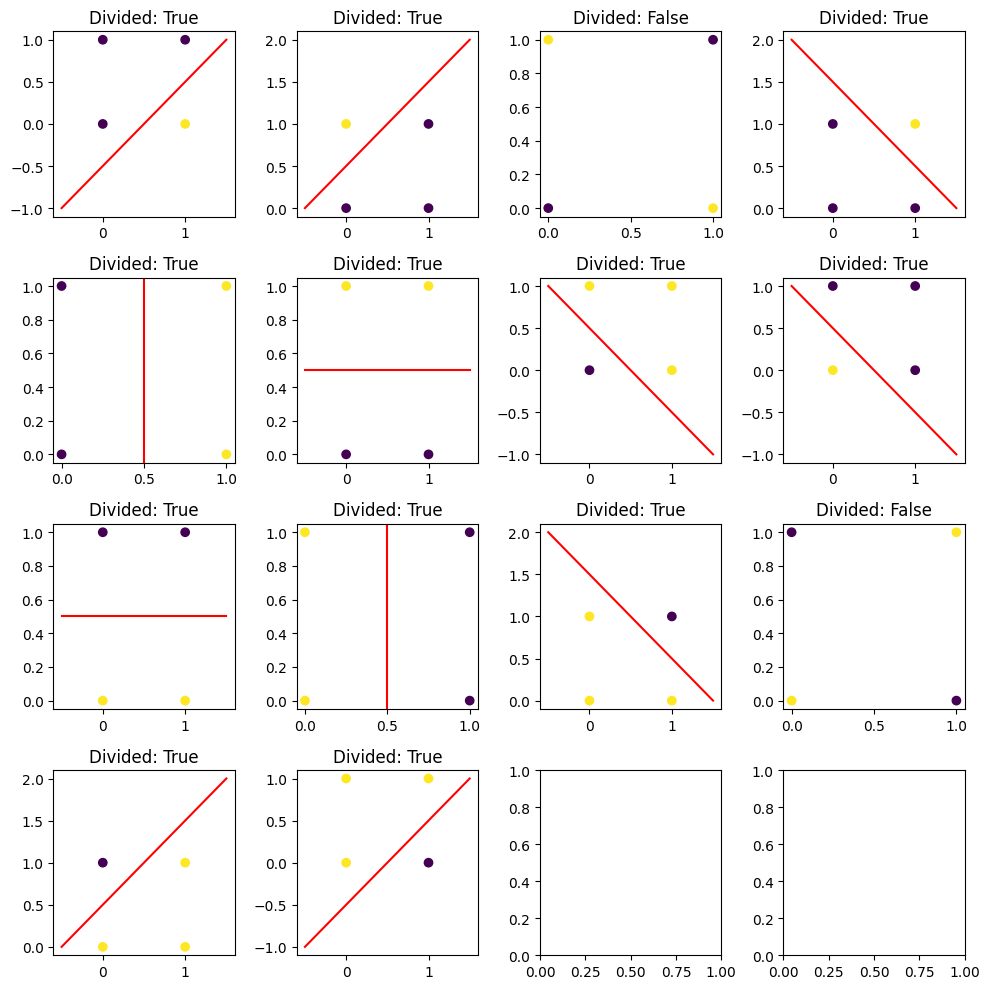

In [85]:
import matplotlib.pyplot as plt


def visualize_shattering():
    S_n = [[0, 0], [1, 1], [0, 1], [1, 0]]
    coefs_for_plots = is_shattered(None, len(S_n), S_n)[1]
    
    # 4x4 grid of plots, ommiting if all points belonged to the same class
    fig, axs = plt.subplots(4, 4, figsize=(10, 10))
    for i, coefs in enumerate(coefs_for_plots):
        X = [x[0] for x in S_n]
        Y = [x[1] for x in S_n]
        COLOR = coefs[2]
        ax = axs[i//4, i%4]
        ax.scatter(X, Y, c=COLOR)
        ax.set_title(f'Divided: {coefs[0]}')
        if coefs[0]:
            if coefs[1][0][0][1] == 0:
                ax.axvline(-coefs[1][1] / coefs[1][0][0][0], c='r')
            else:
                LINE_X = np.linspace(-0.5, 1.5, 100)
                LINE_Y = (- coefs[1][0][0][0] * LINE_X - coefs[1][1]) / coefs[1][0][0][1]
                ax.plot(LINE_X, LINE_Y, c='r')
    plt.tight_layout()
    plt.show()

visualize_shattering()

### d)

In [ ]:
# code

In [89]:
d_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
N_repetitions = 5 # took 40s, was enough to get the results 
max_points = 14

results = []

for d in d_values:
    d_min_points_not_shuttered = None
    for points_count in range(2, max_points):
        for _ in range(N_repetitions):
            S_n = np.random.normal(size=(points_count, d))
            if not is_shattered(d, points_count, S_n)[0]:
                d_min_points_not_shuttered = points_count
                break
        if d_min_points_not_shuttered != None:
            break
    results.append([d, d_min_points_not_shuttered])

results

[[2, 4], [3, 5], [4, 6], [5, 7], [6, 8], [7, 9], [8, 10], [9, 11], [10, 12]]

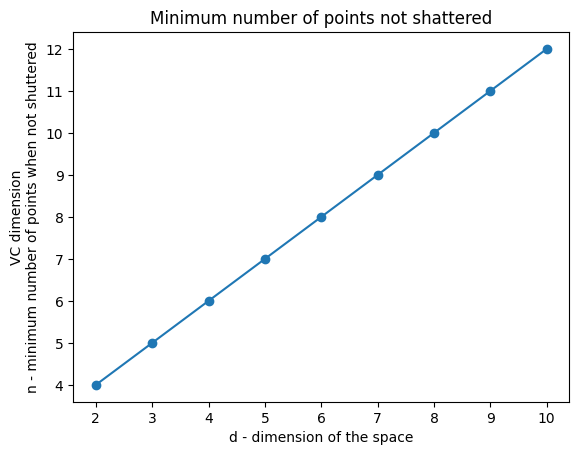

In [94]:
plt.plot([r[0] for r in results], [r[1] for r in results], 'o-')
plt.title('Minimum number of points not shattered')
plt.xlabel('d - dimension of the space')
plt.ylabel('VC dimension\nn - minimum number of points when not shuttered')
plt.show()

As in the beginning, facts from the lecture were:

> If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then:
> - $VC(\mathcal{F}_{a,b}) \leq d+2$.   <----- this one is on the plot
> - $VC(\mathcal{F}_{a,b}) = d+1$.

Random sampling from multivariate normal 5 times resulted in matching the first fact. Adding more samples might result in matching the second fact.

My result: $VC(\mathcal{F}_{a,b}) = d+2$

### e)

In [ ]:
# A hint: change a kernel in SVM

In [2]:
def is_shattered(d, n, S_n):
    classes = list(product([0, 1], repeat=n))
    # remove if there is only one class
    classes = [c for c in classes if not len(set(c)) == 1]

    results = []

    for classes_combination in classes:
        svc = SVC(C=10000, shrinking=False, kernel='rbf', tol=1e-5)
        try: 
            svc.fit(S_n, classes_combination)
            if np.all(svc.predict(S_n) == classes_combination):
               results.append([True, (svc.coef_, svc.intercept_), classes_combination])
            else:
                results.append([False, None, classes_combination])
        except:
            pass
    return all([r[0] for r in results]), results

In [8]:
d_values = [2, 3, 4]
N_repetitions = 5
max_points = 11

results = []

for d in d_values:
    d_min_points_not_shuttered = None
    for points_count in range(2, max_points):
        for _ in range(N_repetitions):
            S_n = np.random.normal(size=(points_count, d))
            if not is_shattered(d, points_count, S_n)[0]:
                d_min_points_not_shuttered = points_count
                break
        if d_min_points_not_shuttered != None:
            break
    results.append([d, d_min_points_not_shuttered])

results

[[2, 8], [3, None], [4, None]]

In [17]:
print("Results with RBF kernel and 5 repetitions for d-dimensional ball:")

for d, n in results:
    if n == None:
        print(f'For d={d} the minimum number of points not shattered is greater than {max_points} or was not found')
    else:
        print(f'For d={d} the minimum number of points not shattered is {n}')

Results with RBF kernel and 5 repetitions for d-dimensional ball:
For d=2 the minimum number of points not shattered is 8
For d=3 the minimum number of points not shattered is greater than 11 or was not found
For d=4 the minimum number of points not shattered is greater than 11 or was not found


Result for 3D and 4D space with rbf kernel mean that for all numbers of points from 2 to 11, all of the 5 random draws of them were shattered. 

2D ball with 8 points was shattered by the rbf kernel.